Importa as bibliotecas necessárias e prepara as variávesi que serão utilizadas

In [31]:
import numpy as np
from matplotlib import pyplot as pl
import cv2 as cv
import glob

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((3*3,3), np.float32)
objp[:,:2] = np.mgrid[0:3,0:3].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./imagens/*.jpg')

In [32]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (3,3), cv.CALIB_CB_ADAPTIVE_THRESH)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        print("-")
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (3,3), corners2, ret)
        pl.figure(figsize=(10, 6))
        pl.imshow(img)
        pl.show()

In [22]:
#returns the camera matrix, distortion coefficients, rotation and translation vectors etc.
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [27]:
#refine the camera matrix based on a free scaling parameter 
img = cv.imread('./imagens/foto3.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

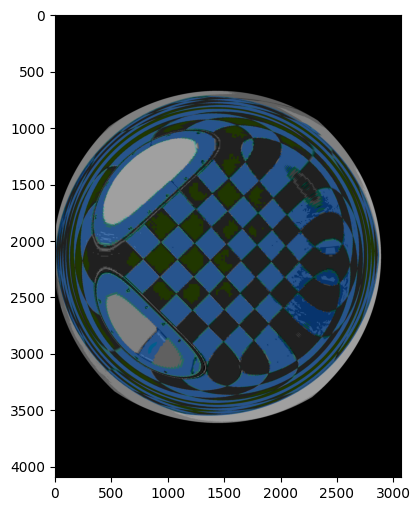

In [28]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
pl.figure(figsize=(10, 6))
pl.imshow(dst)
pl.show()